# This Notebook describes the delock of a feedback loop in TDM.
### L. Ravera @IRAP
### June 15, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
npts=2**8
nper=2 # number of periods on the plot
flux=nper*np.arange(npts)/npts

In [3]:
# Sinusoidal SQUID tranfer function
def squid_function_sine(flux):
    return np.sin(flux*2*np.pi)

In [4]:
# Realistic SQUID tranfer function
# Function is normalised to be between -1 and +1
def squid_function(x):
    x=1.4-x
    a=np.array([2.40329e-06, 9.54011e-06])
    p=np.array([6.299441, -0.94834025, 0.39483974])
    Error = a[0]*np.sin(p[0]*(x+p[1])+p[2]*np.sin(p[0]*(x+p[1])))+a[1]
    mini, maxi=7.137065534940941e-06, 1.1943246742519231e-05
    return 2*(Error-(mini+maxi)/2)/(maxi-mini)

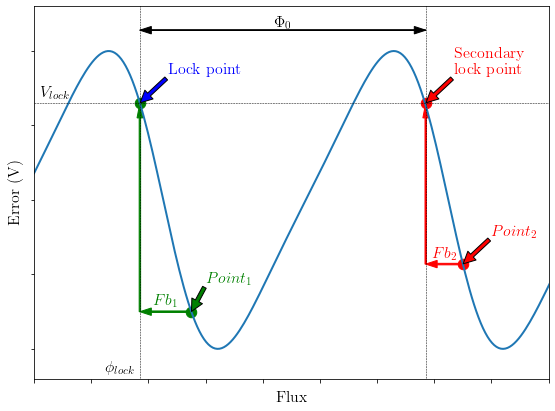

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

fig=plt.figure(1,(8,6))
ax=fig.add_subplot(1,1,1)
error=squid_function(flux)
ax.plot(flux, error, label=r'SQUID V($\phi$)', linewidth=2)
#ax.legend(loc='lower left')
ax.set_xlabel(r"Flux")
ax.set_ylabel(r"Error (V)")
ax.set_yticklabels([])
ax.set_xticklabels([])

phi_lock=0.37
v_lock=squid_function(phi_lock)
ax.scatter([phi_lock], [v_lock], c='g', s=[110], marker='o')

ax.annotate('Lock point', color='b', xy=(phi_lock, v_lock), 
            xytext=(phi_lock+0.1, v_lock+0.2),
            arrowprops=dict(facecolor='b', shrink=0.01),
            )
ax.plot([phi_lock, phi_lock], [-1.3, 1.35], '--k', linewidth=0.5)
ax.text(phi_lock-0.02, -1.2+0.05, r'$\phi_{lock}$', color='k', horizontalalignment='right')
ax.plot([0, 5], [v_lock, v_lock], '--k', linewidth=0.5)
ax.text(0.02, v_lock+0.05, r'$V_{lock}$', color='k', horizontalalignment='left')

phi_pulse1=0.55
v_pulse1=squid_function(phi_pulse1)
color1='green'
ax.scatter([phi_pulse1], [v_pulse1], c=color1, s=[110], marker='o')
#ax.text(phi_pulse1+0.02, v_pulse1+0.05, 'Error1', color='orange')
ax.annotate(r'$Point_1$', color=color1, xy=(phi_pulse1, v_pulse1), xytext=(phi_pulse1+0.05, v_pulse1+0.2),
            arrowprops=dict(facecolor=color1, shrink=0.01),
            )
ax.arrow(phi_pulse1, v_pulse1, phi_lock-phi_pulse1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.01, fc=color1, ec=color1)
ax.text(0.5*(phi_lock+phi_pulse1), v_pulse1+0.05, r'$Fb_1$', color=color1, horizontalalignment='center')
ax.arrow(phi_lock, v_pulse1, 0, v_lock-v_pulse1, 
         length_includes_head=True, head_width=0.02, head_length=0.1, 
         width=0.005, fc=color1, ec=color1)

#phi_pulse2=1.135
phi_pulse2=1.5
phi_lock2=phi_lock+1
v_pulse2=squid_function(phi_pulse2)
color2='red'
ax.scatter([phi_lock2], [v_lock], c=color2, s=[110], marker='o')
ax.plot([phi_lock2, phi_lock2], [-1.3, 1.35], '--k', linewidth=0.5)
ax.annotate('Secondary\nlock point', color=color2, xy=(phi_lock2, v_lock), 
            xytext=(phi_lock2+0.1, v_lock+0.2),
            arrowprops=dict(facecolor=color2, shrink=0.01),
            )

ax.scatter([phi_pulse2], [v_pulse2], c=color2, s=[110], marker='o')
#ax.text(phi_pulse2+0.02, v_pulse2+0.05, 'Error2', color='red')
ax.annotate(r'$Point_2$', color=color2, xy=(phi_pulse2, v_pulse2), 
            xytext=(phi_pulse2+0.1, v_pulse2+0.2),
            arrowprops=dict(facecolor=color2, shrink=0.01),
            )
ax.arrow(phi_pulse2, v_pulse2, phi_lock2-phi_pulse2, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.01, fc=color2, ec=color2)
ax.text(0.5*(phi_lock2+phi_pulse2), v_pulse2+0.05, r'$Fb_2$', color=color2, horizontalalignment='center')
ax.arrow(phi_lock2, v_pulse2, 0, v_lock-v_pulse2, 
         length_includes_head=True, head_width=0.02, head_length=0.1, 
         width=0.005, fc=color2, ec=color2)

ax.arrow(phi_lock, 1.3-0.16, 1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.002, fc='k', ec='k')
ax.arrow(phi_lock+1, 1.3-0.16, -1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.002, fc='k', ec='k')
ax.text(phi_lock+0.5, 1.3-0.13, r'$\Phi_0$', color='k', horizontalalignment='center')

ax.axis((0, 1.8, -1.2, 1.3))

#ax.grid(color='k', linestyle=':', linewidth=0.5)

fig.tight_layout()
plt.savefig('car_squid.png', dpi=300, bbox_inches='tight')


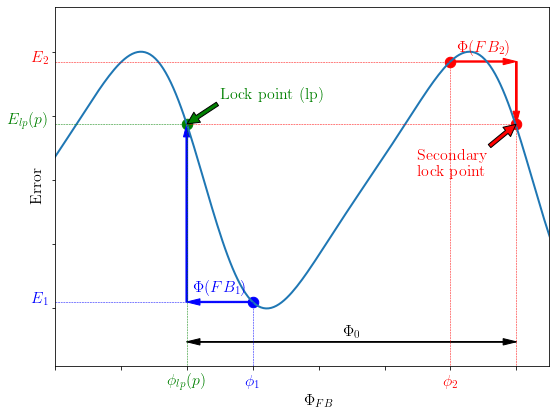

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

fig=plt.figure(1,(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(flux, squid_function(flux), label=r'SQUID V($\phi$)', linewidth=2)
#ax.legend(loc='lower left')
#ax.set_xlabel(r'$\Phi = \Phi_{TES} - \Phi_{FB}$')

#ax.text(3, -1.6, r"Flux (\Phi = \Phi_{TES} - \Phi{FB})", color=color1, horizontalalignment='center')

ax.text(0.8, -1.75, r'$\Phi_{FB}$', color='k', horizontalalignment='center')

ax.set_ylabel("Error")
ax.set_yticklabels([])
ax.set_xticklabels([])

phi_lock=0.4
v_lock=squid_function(phi_lock)
ax.scatter([phi_lock], [v_lock], c='g', s=[110], marker='o')

#ax.text(phi_lock+0.02, v_lock+0.05, 'Lock point', color='g')
ax.annotate('Lock point (lp)', color='g', xy=(phi_lock, v_lock), 
            xytext=(phi_lock+0.1, v_lock+0.2),
            arrowprops=dict(facecolor='g', shrink=0.01),
            )
ax.plot([phi_lock, phi_lock], [-1.5, v_lock], '--g', linewidth=0.5)
ax.text(phi_lock, -1.6, r'$\phi_{lp}(p)$', color='g', horizontalalignment='center')
ax.plot([0, phi_lock], [v_lock, v_lock], '--g', linewidth=0.5)
ax.text(-0.02, v_lock, r'$E_{lp}(p)$', color='g', horizontalalignment='right')

phi_pulse1=0.6
v_pulse1=squid_function(phi_pulse1)
color1='blue'
ax.plot([0, phi_pulse1], [v_pulse1, v_pulse1], '--b', linewidth=0.5)
ax.plot([phi_pulse1, phi_pulse1], [-2, v_pulse1], '--b', linewidth=0.5)
ax.scatter([phi_pulse1], [v_pulse1], c=color1, s=[110], marker='o')
#ax.text(phi_pulse1+0.02, v_pulse1+0.05, 'Error1', color='orange')
ax.arrow(phi_pulse1, v_pulse1, phi_lock-phi_pulse1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.01, fc=color1, ec=color1)
ax.text(0.5*(phi_lock+phi_pulse1), v_pulse1+0.08, r'$\Phi (FB_1)$', color=color1, horizontalalignment='center')
ax.arrow(phi_lock, v_pulse1, 0, v_lock-v_pulse1, 
         length_includes_head=True, head_width=0.02, head_length=0.1, 
         width=0.005, fc=color1, ec=color1)
ax.text(-0.02, v_pulse1, r'$E_1$', color=color1, horizontalalignment='right')
ax.text(phi_pulse1, -1.6, r'$\phi_1$', color=color1, horizontalalignment='center')


phi_pulse2=1.135
phi_pulse2=1.2

phi_lock2=phi_lock+1
v_pulse2=squid_function(phi_pulse2)
color2='red'
ax.plot([phi_lock, phi_lock2], [v_lock, v_lock], '--r', linewidth=0.5)
ax.plot([0, phi_pulse2], [v_pulse2, v_pulse2], '--r', linewidth=0.5)
ax.plot([phi_pulse2, phi_pulse2], [-1.5, v_pulse2], '--r', linewidth=0.5)
ax.scatter([phi_lock2], [v_lock], c=color2, s=[110], marker='o')
ax.plot([phi_lock2, phi_lock2], [-1.5, v_lock], '--r', linewidth=0.5)
ax.annotate('Secondary\nlock point', color=color2, xy=(phi_lock2, v_lock), 
            xytext=(phi_lock2-0.3, v_lock-0.4),
            arrowprops=dict(facecolor=color2, shrink=0.01),
            )
ax.scatter([phi_pulse2], [v_pulse2], c=color2, s=[110], marker='o')
#ax.text(phi_pulse2+0.02, v_pulse2+0.05, 'Error2', color='red')
ax.arrow(phi_pulse2, v_pulse2, phi_lock2-phi_pulse2, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.01, fc=color2, ec=color2)
ax.text(0.5*(phi_lock2+phi_pulse2), v_pulse2+0.08, r'$\Phi (FB_2)$', color=color2, horizontalalignment='center')
ax.arrow(phi_lock2, v_pulse2, 0, v_lock-v_pulse2, 
         length_includes_head=True, head_width=0.02, head_length=0.1, 
         width=0.005, fc=color2, ec=color2)
ax.text(-0.02, v_pulse2, r'$E_2$', color=color2, horizontalalignment='right')
ax.text(phi_pulse2, -1.6, r'$\phi_2$', color=color2, horizontalalignment='center')


phi0_offset=-1.1
ax.arrow(phi_lock, phi0_offset-0.16, 1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.002, fc='k', ec='k')
ax.arrow(phi_lock+1, phi0_offset-0.16, -1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.002, fc='k', ec='k')
ax.text(phi_lock+0.5, phi0_offset-0.11, r'$\Phi_0$', color='k', horizontalalignment='center')

ax.axis((0, 1.5, -1.45, 1.35))

#ax.grid(color='k', linestyle=':', linewidth=0.5)

fig.tight_layout()
plt.savefig('car_squid_2points.png', dpi=300, bbox_inches='tight')


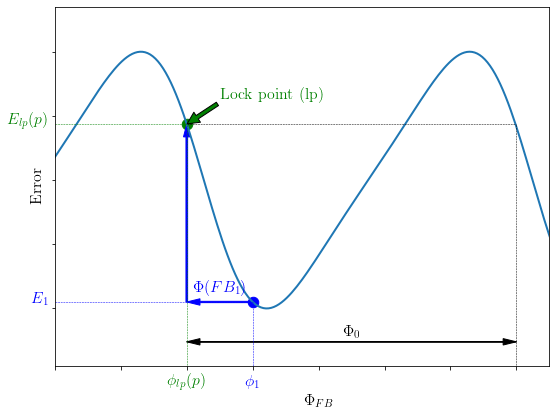

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

fig=plt.figure(1,(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(flux, squid_function(flux), label=r'SQUID V($\phi$)', linewidth=2)
#ax.legend(loc='lower left')
#ax.set_xlabel(r'$\Phi = \Phi_{TES} - \Phi_{FB}$')

#ax.text(3, -1.6, r"Flux (\Phi = \Phi_{TES} - \Phi{FB})", color=color1, horizontalalignment='center')

ax.text(0.8, -1.75, r'$\Phi_{FB}$', color='k', horizontalalignment='center')
ax.set_ylabel("Error")
ax.set_yticklabels([])
ax.set_xticklabels([])

phi_lock=0.4
v_lock=squid_function(phi_lock)
ax.scatter([phi_lock], [v_lock], c='g', s=[110], marker='o')

#ax.text(phi_lock+0.02, v_lock+0.05, 'Lock point', color='g')
ax.annotate('Lock point (lp)', color='g', xy=(phi_lock, v_lock), 
            xytext=(phi_lock+0.1, v_lock+0.2),
            arrowprops=dict(facecolor='g', shrink=0.01),
            )
ax.plot([phi_lock, phi_lock], [-1.5, v_lock], '--g', linewidth=0.5)
ax.text(phi_lock, -1.6, r'$\phi_{lp}(p)$', color='g', horizontalalignment='center')
ax.plot([0, phi_lock], [v_lock, v_lock], '--g', linewidth=0.5)
ax.text(-0.02, v_lock, r'$E_{lp}(p)$', color='g', horizontalalignment='right')

phi_pulse1=0.6
v_pulse1=squid_function(phi_pulse1)
color1='blue'
ax.plot([0, phi_pulse1], [v_pulse1, v_pulse1], '--b', linewidth=0.5)
ax.plot([phi_pulse1, phi_pulse1], [-2, v_pulse1], '--b', linewidth=0.5)
ax.scatter([phi_pulse1], [v_pulse1], c=color1, s=[110], marker='o')
#ax.text(phi_pulse1+0.02, v_pulse1+0.05, 'Error1', color='orange')
ax.arrow(phi_pulse1, v_pulse1, phi_lock-phi_pulse1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.01, fc=color1, ec=color1)
ax.text(0.5*(phi_lock+phi_pulse1), v_pulse1+0.08, r'$\Phi (FB_1)$', color=color1, horizontalalignment='center')
ax.arrow(phi_lock, v_pulse1, 0, v_lock-v_pulse1, 
         length_includes_head=True, head_width=0.02, head_length=0.1, 
         width=0.005, fc=color1, ec=color1)
ax.text(-0.02, v_pulse1, r'$E_1$', color=color1, horizontalalignment='right')
ax.text(phi_pulse1, -1.6, r'$\phi_1$', color=color1, horizontalalignment='center')

phi0_offset=-1.1
ax.arrow(phi_lock, phi0_offset-0.16, 1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.002, fc='k', ec='k')
ax.arrow(phi_lock+1, phi0_offset-0.16, -1, 0, 
         length_includes_head=True, head_width=0.05, head_length=0.04, 
         width=0.002, fc='k', ec='k')
ax.text(phi_lock+0.5, phi0_offset-0.11, r'$\Phi_0$', color='k', horizontalalignment='center')

ax.axis((0, 1.5, -1.45, 1.35))

#ax.grid(color='k', linestyle=':', linewidth=0.5)

ax.plot([phi_lock2, phi_lock2], [-1.5, v_lock], '--k', linewidth=0.5)
ax.plot([phi_lock, phi_lock2], [v_lock, v_lock], '--k', linewidth=0.5)

#ax.grid(color='k', linestyle=':', linewidth=0.5)

fig.tight_layout()
plt.savefig('car_squid_1point.png', dpi=300, bbox_inches='tight')



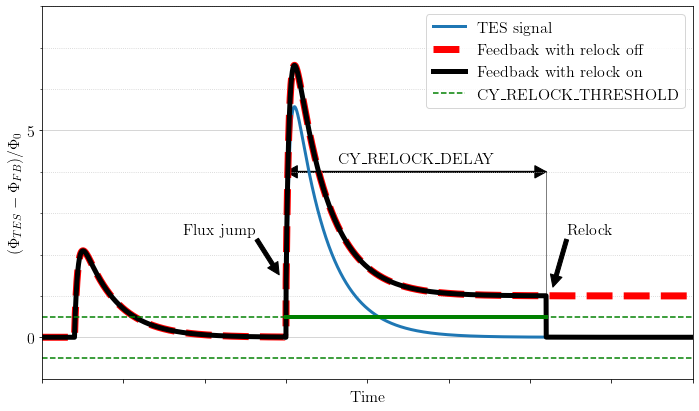

In [8]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

npts=2**12
t=30*np.arange(npts)/npts
ratio=15

taurise=0.01*ratio
taufall=0.1*ratio
pulse=np.zeros(len(t))
i1=200
pulse[i1:]=-3*(np.exp(-t[:-i1]/taurise)-np.exp(-t[:-i1]/taufall))
i2=1500
pulse[i2:]=-8*(np.exp(-t[:-i2]/taurise)-np.exp(-t[:-i2]/taufall))

# Flux jump
pulse_delock=pulse.copy()
pulse_delock[i2+1:]+=1

relock_delay=1600
pulse_relock=pulse_delock.copy()
pulse_relock[i2+relock_delay:]-=1

fig=plt.figure(1,(10,6))
ax=fig.add_subplot(1,1,1)

fbThreshold=0.5
plt.plot(pulse, linewidth=3, label=r'TES signal')
plt.plot(pulse_delock, '--', color='r', linewidth=7, label=r'Feedback with relock off')
plt.plot(pulse_relock, '-', color='k', linewidth=5, label=r'Feedback with relock on')
plt.plot([0, 4000], [fbThreshold,fbThreshold], '--', color='g', linewidth=1.5, label=r'CY\_RELOCK\_THRESHOLD')
plt.plot([0, 4000], [-fbThreshold,-fbThreshold], '--', color='g', linewidth=1.5)
plt.plot([i2, i2+relock_delay], [fbThreshold,fbThreshold], '-', color='g', linewidth=4)
#plt.plot([0, 4000], [1,1], '-', color='g', linewidth=1.5, label=r"Flux=$\Phi_0$")
#plt.plot([0, 4000], [0,0], '-', color='k', linewidth=1.5, label=r"Flux=$0$")

plt.legend(loc='best')

plt.plot([i2+relock_delay, i2+relock_delay], [1, 4], 'k', linewidth=0.5)
ax.arrow(i2, 4, relock_delay, 0, 
         length_includes_head=True, head_width=0.3, head_length=70, 
         width=0.02, fc='k', ec='k')
ax.arrow(i2+relock_delay, 4, -relock_delay, 0, 
         length_includes_head=True, head_width=0.3, head_length=70, 
         width=0.02, fc='k', ec='k')
ax.text(i2+relock_delay*0.5, 4.2, 'CY\_RELOCK\_DELAY', color='k', horizontalalignment='center')

ax.annotate('Flux jump', color='k', xy=(i2-40, 1.5), 
            xytext=(i2-630, 2.5),
            arrowprops=dict(facecolor='k', shrink=0.01),
            )
ax.annotate('Relock', color='k', xy=(i2+relock_delay+40, 1.2), 
            xytext=(i2+relock_delay+130, 2.5),
            arrowprops=dict(facecolor='k', shrink=0.01),
            )

ax.set_xlabel(r'Time')
ax.set_ylabel(r'($\Phi_{TES}-\Phi_{FB}) / \Phi_0$')
#ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis((0, 4000, -1, 8))

# Change major yticks to show every 5.
ax.yaxis.set_major_locator(MultipleLocator(5))

# Change minor yticks to show every 1. (5/5 = 1)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='-')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

ax.yaxis.grid(True)
ax.xaxis.grid(False)

fig.tight_layout()
plt.savefig('pulse.png', dpi=300, bbox_inches='tight')
